# librarys for pre-processing, cleaning, analysis and Model Building:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
print("Success!")

Success!


# Importing train and test datasets

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Exploring the datasets

In [3]:
print(f"Training set has column names: \n{df_train.columns}\n")
print(f"Testing set has column names: \n{df_test.columns}")

Training set has column names: 
Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Testing set has column names: 
Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')


In [4]:
print(f"Training set size: \n{df_train.shape}\n")
print(f"Testing set size: \n{df_test.shape}")

Training set size: 
(1458644, 11)

Testing set size: 
(625134, 9)


# Observations
1. We can see that test set has 9 columns and trainset has 11 columns.
2. The columns that are there in training set and not there in testing set is dropoff_datetime and trip_duration.

In [5]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

# Observations
1. There are no null vaues in both training and testining datasets.
2. Therefore missing value anlysis is not needed here.

In [9]:
print(f"Training set has column with datatypes: \n{df_train.dtypes}\n")
print(f"Testing set has column with datatypes: \n{df_test.dtypes}")

Training set has column with datatypes: 
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Testing set has column with datatypes: 
id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object


# observations
1. In both the datasets picup_datetime and dropoff_datetime are not in datetime datatype.
2. So converting them to their datatypes(datetime).

In [10]:
#for training dataset
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])

#for testing dataset
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])

#now checking whether all features given are in their respective datatypes
print(f"Training set has column with datatypes: \n{df_train.info()}\n")
print(f"Testing set has column with datatypes: \n{df_test.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB
Training set has column with datatypes: 
None

<cl

# Observations
1. Yes now given features are in their respective datatypes.

In [11]:
#overall anlysis of all numerical columns

print(f"The overall anlysis of training dataset:\n")
df_train.describe()

The overall anlysis of training dataset:



,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


In [12]:
print(f"The overall anlysis of testing dataset:\n")
df_test.describe()

The overall anlysis of testing dataset:



,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,2016-04-01 13:27:01.567467264,1.661765,-73.973614,40.750927,-73.973458,40.751816
min,1.000000,2016-01-01 00:00:22,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,2016-02-17 19:44:19,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,2016-04-01 20:01:43,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2016-05-15 10:07:52.750000128,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,2016-06-30 23:59:58,9.000000,-69.248917,42.814938,-67.496796,48.857597
std,0.498782,NaN,1.311293,0.073389,0.029848,0.072565,0.035824


# Observations
1. count describes no.of items in whole dataset of every column. training set =1458644 and testingset = 625134.
2. The data in the dataset was collected from date 1st January, 2016 to 6th June, 2016.
3. The minimum and maximum trip durations are 1 and 35,26,282 seconds respectively.
4. The average trip duration of all trips is around 1000 seconds i.e roughly 17hours.

# Extracting new features form given features

In [13]:
#EXTRACT FEATURES FROM PICKUP AND DROPOFF DATETIME FEATURES THAT ARE NECESSARY AND ADD THEM TO DATAFRAME
#for training dataset:

df_train['pickup_week_day'] = df_train['pickup_datetime'].apply(lambda x: x.strftime('%A'))
df_train['pickup_week_num'] = df_train['pickup_datetime'].dt.weekday
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_date'] = df_train['pickup_datetime'].dt.date.apply(pd.to_datetime)
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month

df_train['dropoff_week_day'] = df_train['dropoff_datetime'].apply(lambda x: x.strftime('%A'))
df_train['dropoff_week_num'] = df_train['dropoff_datetime'].dt.weekday
df_train['dropoff_hour'] = df_train['dropoff_datetime'].dt.hour
df_train['dropoff_date'] = df_train['dropoff_datetime'].dt.date.apply(pd.to_datetime)
df_train['dropoff_month'] = df_train['dropoff_datetime'].dt.month

#making sure created datatypes are in their respective datatypes
df_train[['pickup_time', 'dropoff_time']] = df_train[['pickup_datetime', 'dropoff_datetime']].apply(lambda x: x.dt.time)
df_train[['pickup_time', 'dropoff_time']] = df_train[['pickup_datetime', 'dropoff_datetime']].apply(pd.to_datetime)
df_train['no_of_days'] = (df_train['dropoff_datetime'] - df_train['pickup_datetime']).dt.days

In [14]:
#for testing data set:

df_test['pickup_week_day'] = df_test['pickup_datetime'].apply(lambda x: x.strftime('%A'))
df_test['pickup_week_num'] = df_test['pickup_datetime'].dt.weekday
df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test['pickup_date'] = df_test['pickup_datetime'].dt.date.apply(pd.to_datetime)
df_test['pickup_month'] = df_test['pickup_datetime'].dt.month

#making sure created datatypes are in their respective datatypes
df_test[['pickup_time']] = df_test[['pickup_datetime']].apply(lambda x: x.dt.time)
df_test[['pickup_time']] = df_test[['pickup_datetime']].apply(pd.to_datetime)

In [15]:
#categorizing into morning, afternoon, evening and night

def session(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

pickup_hour_train = df_train['pickup_hour'].tolist()
dropoff_hour_train = df_train['dropoff_hour'].tolist()
pickup_hour_test = df_test['pickup_hour'].tolist()

#for training data set:
df_train['pickup_session'] = [session(hour) for hour in pickup_hour_train]
df_train['dropoff_session'] = [session(hour) for hour in dropoff_hour_train]

#for testing data set:
df_test['pickup_session'] = [session(hour) for hour in pickup_hour_test]

In [16]:
#CALCULATE DISTANCE TRAVELLED IN EACH TRIP USING PICKUP AND DROPOFF LONGITUDE AND LATITUDE

#HAVERSINES METHOD IS MOST EFFICIENT METHOD TO CALCULATE THE DIATANCE TRAVELLED

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  #RADIUS OF EARTH

    # CONVERSION FROM DEGREE TO RADIANS
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # HAVERSINE FORMULA
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance #DISTANCE IN KILOMETERS

#for training dataset:
lon1_train = list(df_train["pickup_longitude"])
lon2_train = list(df_train["dropoff_longitude"])
lat1_train = list(df_train["pickup_latitude"])
lat2_train = list(df_train["dropoff_latitude"])
distances_train = []

for a, b, c, d in zip(lat1_train, lon1_train, lat2_train, lon2_train):
    distances_train.append(haversine(a, b, c, d))

df_train['distance'] = distances_train
df_train['speed'] = ((df_train.distance*0.621371)/(df_train.trip_duration/3600)) #in mph(as NYC standard)


#for testing dataset:
lon1_test = list(df_test["pickup_longitude"])
lon2_test = list(df_test["dropoff_longitude"])
lat1_test = list(df_test["pickup_latitude"])
lat2_test = list(df_test["dropoff_latitude"])
distances_test = []

for a, b, c, d in zip(lat1_test, lon1_test, lat2_test, lon2_test):
    distances_test.append(haversine(a, b, c, d))
    
df_test['distance'] = distances_test

In [17]:
#now checking whether all features given are in their respective datatypes
print(f"Training set has column with datatypes: \n{df_train.info()}\n")
print(f"Testing set has column with datatypes: \n{df_test.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_week_day     1458644 non-null  object        
 12  pickup_week_num     1458644 non-null  int32         
 13  pickup_hour 

# Making sure and Obsrvations based on modifications
1. From above data it is confirmed that there aree total of 28 features in training set and 17 in testin set.
2. And all the datatypes created are also in their respective datatypes.
3. No null or missing values.
4. Data untill now is clean and proper.

# Univariant Analysis
1. NOTE: PERFORMIN ANLYSIS ONLY ON TRAINIG DATASET.

The no of service providers :  2
vendor_id
2    780302
1    678342
Name: count, dtype: int64


Text(0.5, 0.98, 'Value Counts')

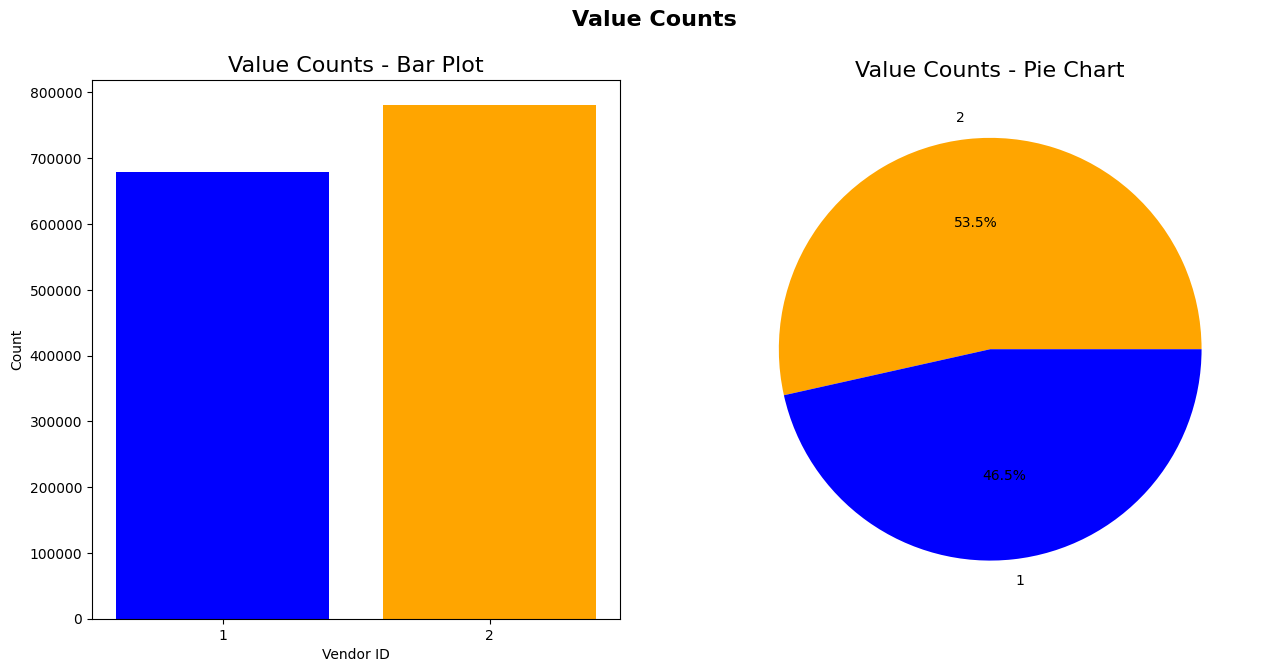

In [18]:
# 1.VENDOR ID

print("The no of service providers : ", df_train.vendor_id.nunique())
print(df_train.vendor_id.value_counts())

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
x = df_train.vendor_id.value_counts().index
y = df_train.vendor_id.value_counts().values

ax[0].bar(x, y, color=['orange', 'blue'])
ax[0].set_xticks([1, 2])
ax[0].set_xlabel('Vendor ID')
ax[0].set_ylabel('Count')
ax[0].set_title('Value Counts - Bar Plot', fontsize=16)

ax[1].pie(y, labels=x, colors=['orange', 'blue'], autopct='%1.1f%%')
ax[1].set_title('Value Counts - Pie Chart', fontsize=16)

fig.suptitle('Value Counts', fontsize=16, fontweight='bold')

# Observation
1. SERVICE PROVIDER WITH VENDOR ID 2 IS MORE FAMOUS AND PREFERRED BY MORE PEOPLE

In [19]:
#TIME SERIES ANLYSIS OF DATA

print(df_train.no_of_days.value_counts())

print("pickup_datetime\t\tdropoff_datetime\ttrip_duration\tno_of_days")
for i, days in enumerate(df_train.no_of_days):
    if(days > 0):
        print(f"{df_train.pickup_datetime[i]}\t{df_train.dropoff_datetime[i]}\t{df_train.trip_duration[i]}\t\t{days}")

no_of_days
0     1458640
22          1
23          1
25          1
40          1
Name: count, dtype: int64
pickup_datetime		dropoff_datetime	trip_duration	no_of_days
2016-01-05 00:19:42	2016-01-27 11:08:38	1939736		22
2016-02-13 22:38:00	2016-03-08 15:57:38	2049578		23
2016-01-05 06:14:15	2016-01-31 01:01:07	2227612		25
2016-02-13 22:46:52	2016-03-25 18:18:14	3526282		40


# Observation
1. There are some trips with more than one day of journe.
2. However those trips are very few in number and it's better to drop them.
3. Most of the trips except 4 are less than one day.
4. Droping trips with more than one days becuase they may deviate our anlysis.

In [20]:
# Droping trips with more than one days becuase they may deviate our anlysis.

no_of_days_to_drop = [22, 23, 25, 40]
df_train = df_train[~df_train['no_of_days'].isin(no_of_days_to_drop)]

#testin whether deleted or not
df_train.shape

(1458640, 28)

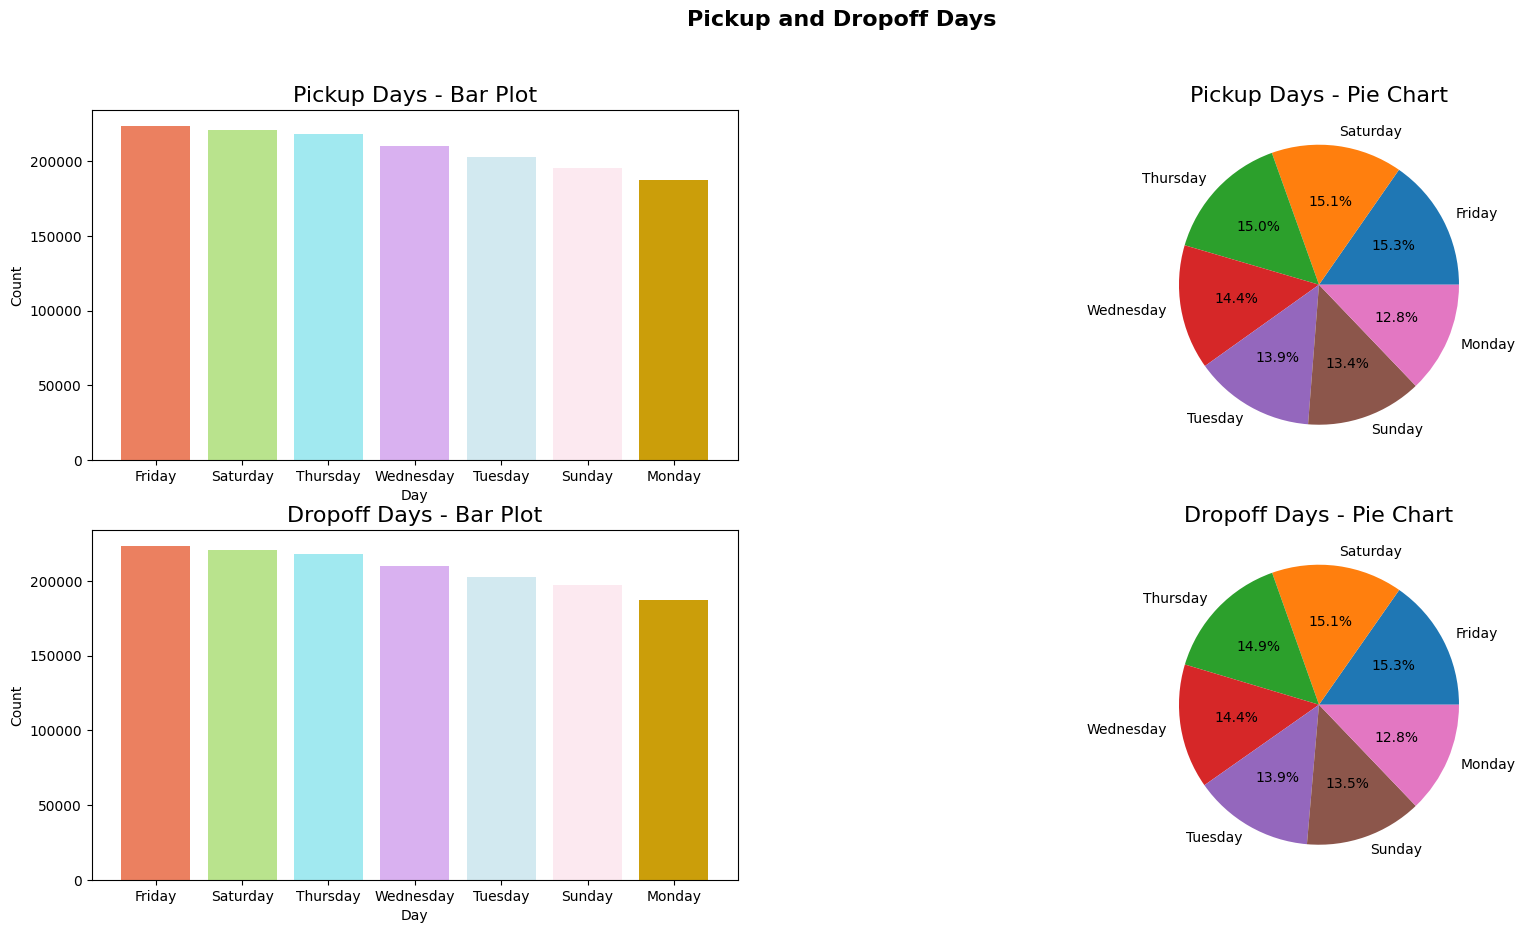

In [21]:
#2.DAYS

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

x1 = df_train.pickup_week_day.value_counts().index
y1 = df_train.pickup_week_day.value_counts().values
x2 = df_train.dropoff_week_day.value_counts().index
y2 = df_train.dropoff_week_day.value_counts().values
labels = x1.tolist()
colors = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0", "#d2e9f0", "#fce9f0", "#cb9e0a"]

ax[0, 0].bar(x1, y1, label=labels, color = colors)  
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('Pickup Days - Bar Plot', fontsize=16)

ax[0, 1].pie(y1, labels=labels, autopct='%1.1f%%')
ax[0, 1].set_title('Pickup Days - Pie Chart', fontsize=16)

ax[1, 0].bar(x2, y2, label=labels, color = colors) 
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Dropoff Days - Bar Plot', fontsize=16)

ax[1, 1].pie(y2, labels=labels, autopct='%1.1f%%')
ax[1, 1].set_title('Dropoff Days - Pie Chart', fontsize=16)

fig.suptitle('Pickup and Dropoff Days', fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4)

# Observation
1. Thursday, Friday and Saturday have more number of people traveling.
2. Monday has least number of people travelling
3. But pie charts confirm that all the dayd equally likely have same number of passengers.

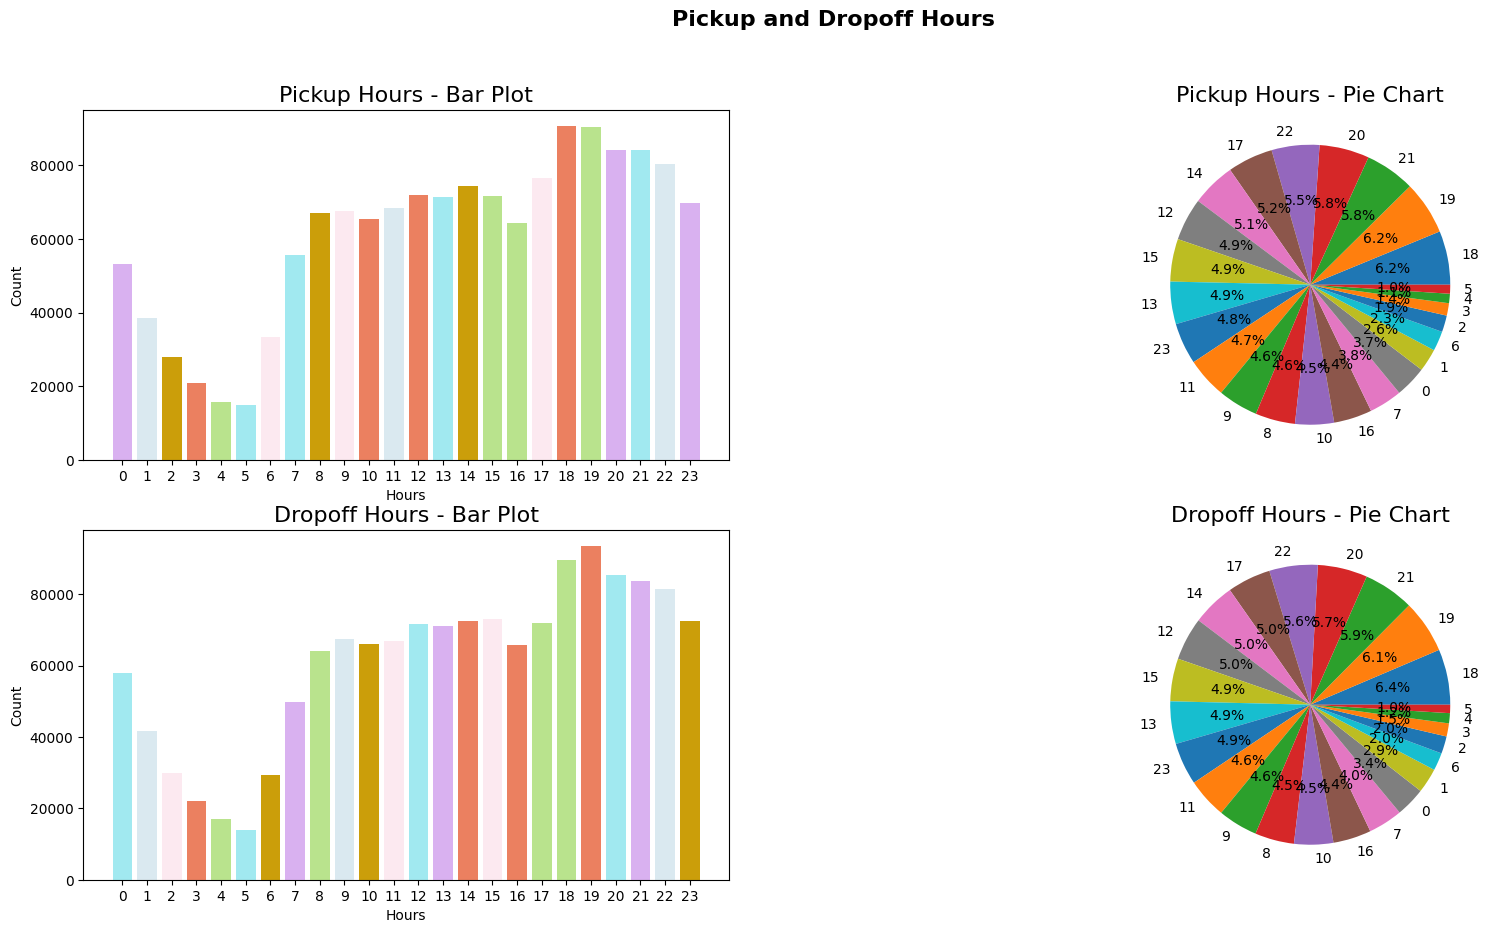

In [22]:
#3.HOURS

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

x1 = df_train.pickup_hour.value_counts().index
y1 = df_train.pickup_hour.value_counts().values
x2 = df_train.dropoff_hour.value_counts().index
y2 = df_train.dropoff_hour.value_counts().values
labels = x1.tolist()
colors = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0", "#dae9f0", "#fce9f0", "#cb9e0a"]

ax[0, 0].bar(x1, y1, label=labels, color=colors)  
ax[0, 0].set_xlabel('Hours')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_xticks(range(0, 24))
ax[0, 0].set_title('Pickup Hours - Bar Plot', fontsize=16)

ax[0, 1].pie(y1, labels=labels, autopct='%1.1f%%')
ax[0, 1].set_title('Pickup Hours - Pie Chart', fontsize=16)

ax[1, 0].bar(x2, y2, label=labels, color=colors) 
ax[1, 0].set_xlabel('Hours')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticks(range(0, 24))
ax[1, 0].set_title('Dropoff Hours - Bar Plot', fontsize=16)

ax[1, 1].pie(y2, labels=labels, autopct='%1.1f%%')
ax[1, 1].set_title('Dropoff Hours - Pie Chart', fontsize=16)

fig.suptitle('Pickup and Dropoff Hours', fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4)


# Observation
1. Evening 6pm to night 10pm have very large number of trips.
2. Trips are very less in morning 1am to 7am and eventually rises and remain dame since evening 6pm.

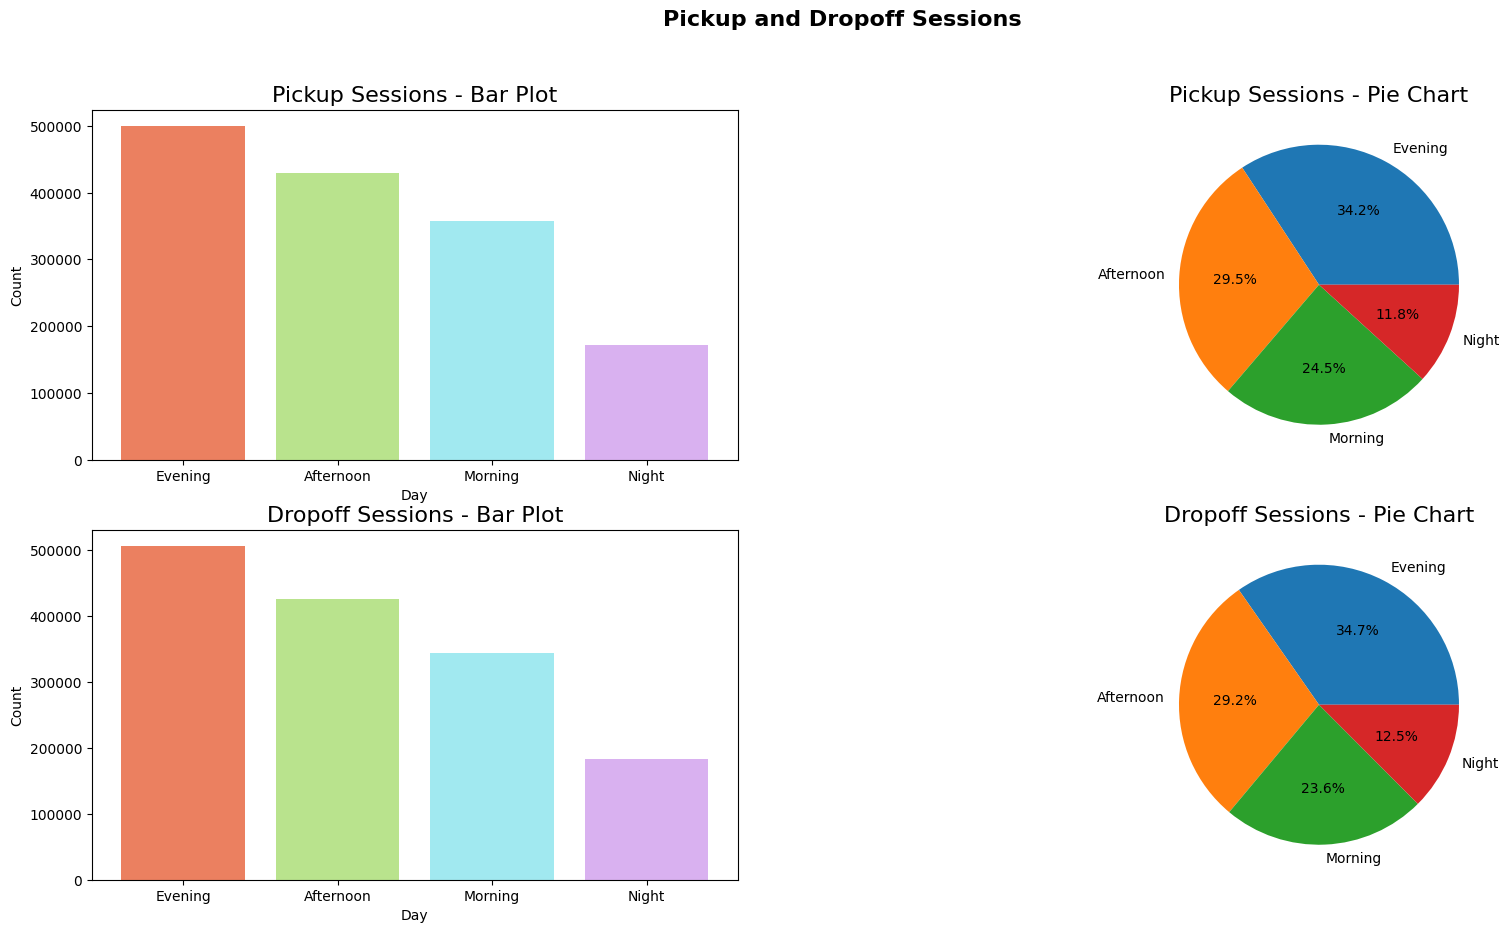

In [23]:
#4.SESSIONS

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

x1 = df_train.pickup_session.value_counts().index
y1 = df_train.pickup_session.value_counts().values
x2 = df_train.dropoff_session.value_counts().index
y2 = df_train.dropoff_session.value_counts().values
labels = x1.tolist()
colors = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0"]

ax[0, 0].bar(x1, y1, label=labels, color=colors)  
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('Pickup Sessions - Bar Plot', fontsize=16)

ax[0, 1].pie(y1, labels=labels, autopct='%1.1f%%')
ax[0, 1].set_title('Pickup Sessions - Pie Chart', fontsize=16)

ax[1, 0].bar(x2, y2, label=labels, color=colors) 
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Dropoff Sessions - Bar Plot', fontsize=16)

ax[1, 1].pie(y2, labels=labels, autopct='%1.1f%%')
ax[1, 1].set_title('Dropoff Sessions - Pie Chart', fontsize=16)

fig.suptitle('Pickup and Dropoff Sessions', fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4)


# Observation
1. AS said prviously trips in the evening are more when comapred to remaining sessions
2. Trips in the night are very less
3. Number of trips eventually grow from morning since evening and decreases in the night.

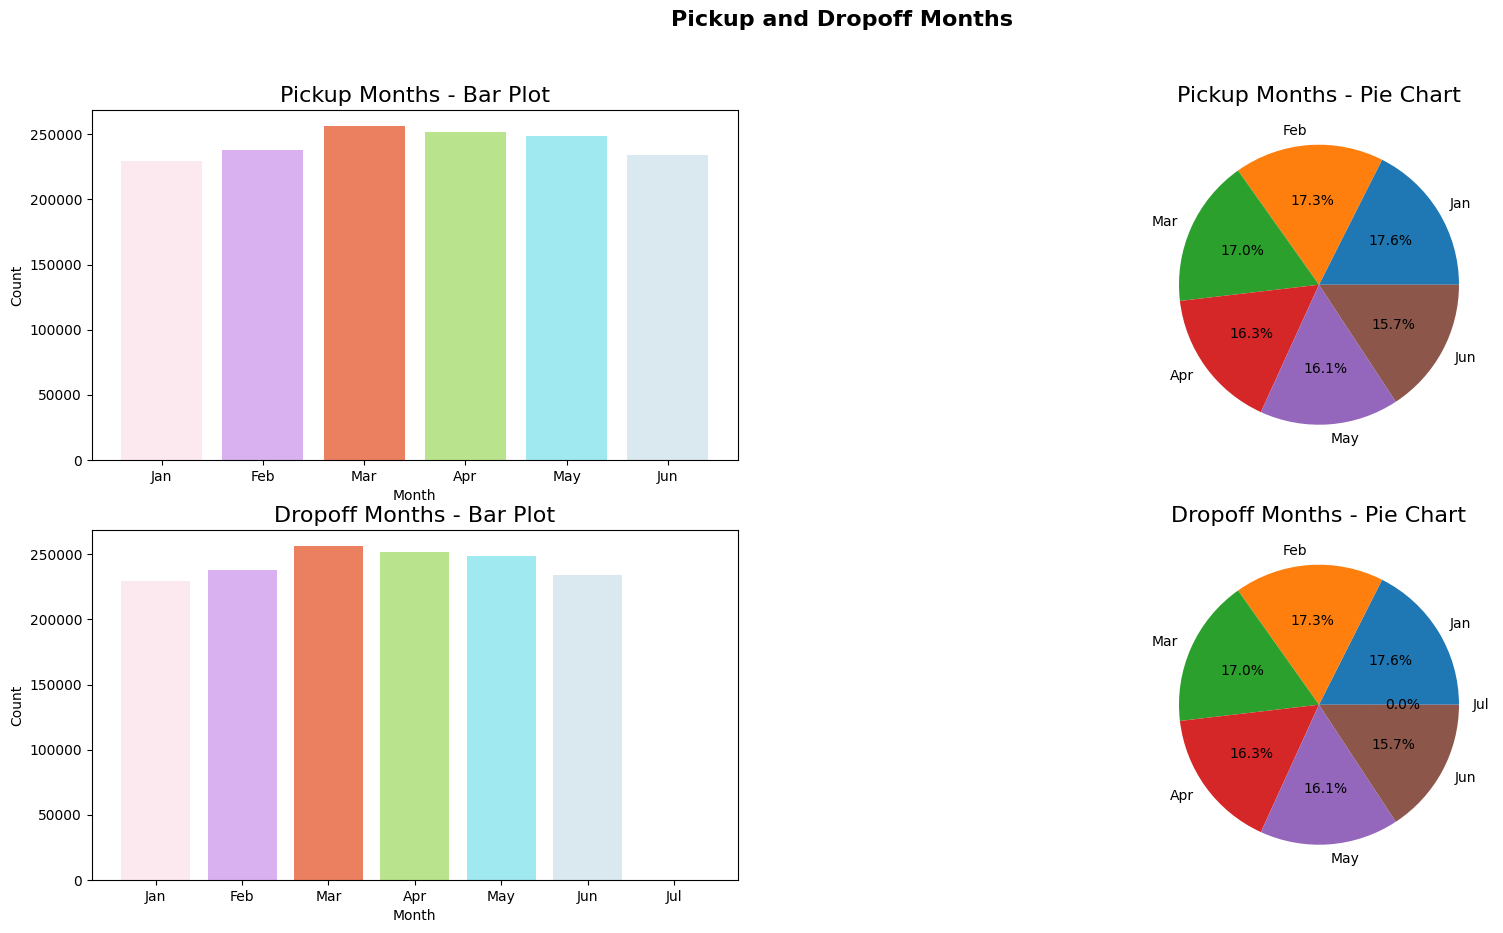

In [24]:
#5.MONTHS

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

x1 = df_train.pickup_month.value_counts().index
y1 = df_train.pickup_month.value_counts().values
x2 = df_train.dropoff_month.value_counts().index
y2 = df_train.dropoff_month.value_counts().values
labels1 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
labels2 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
colors = ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0", "#dae9f0", "#fce9f0", "#cb9e0a", "#db9e0a"]

ax[0, 0].bar(x1, y1, label=labels1, color=colors)  
ax[0, 0].set_xlabel('Month')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_xticks(range(1, len(labels1) + 1))
ax[0, 0].set_xticklabels(labels1)
ax[0, 0].set_title('Pickup Months - Bar Plot', fontsize=16)

ax[0, 1].pie(y1, labels=labels1, autopct='%1.1f%%')
ax[0, 1].set_title('Pickup Months - Pie Chart', fontsize=16)

ax[1, 0].bar(x2, y2, label=labels2, color=colors) 
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticks(range(1, len(labels2) + 1))
ax[1, 0].set_xticklabels(labels2) 
ax[1, 0].set_title('Dropoff Months - Bar Plot', fontsize=16)

ax[1, 1].pie(y2, labels=labels2, autopct='%1.1f%%')
ax[1, 1].set_title('Dropoff Months - Pie Chart', fontsize=16)

fig.suptitle('Pickup and Dropoff Months', fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4)

plt.show()

# Observation
1. Trips are very high in the months March, April, May
2. From pie Charts we can learn that all the months almost have same no.of trips.

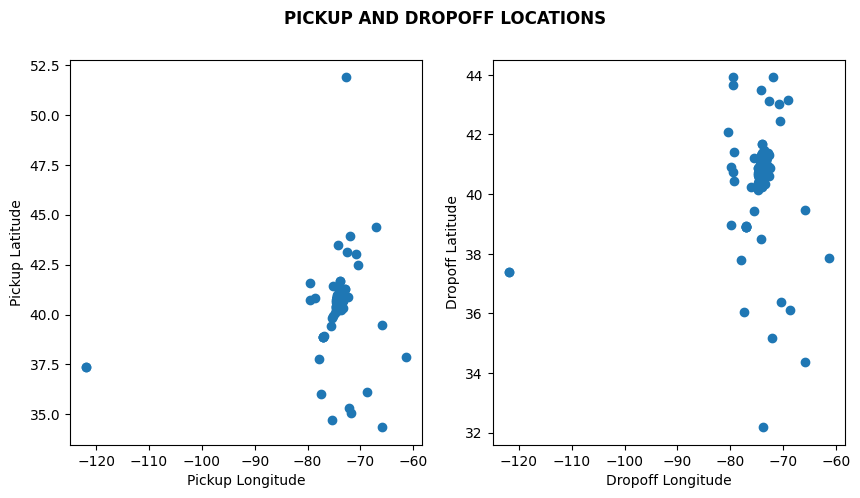

(1458640, 28)

In [25]:
# 6. LOCATIONS: LONGITUDE, LATITUDE:

#PICKUP AND DROPOFF LOCATIONS:

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x=df_train.pickup_longitude, y = df_train.pickup_latitude)
ax[1].scatter(x=df_train.dropoff_longitude, y = df_train.dropoff_latitude)
ax[0].set_ylabel("Pickup Latitude")
ax[0].set_xlabel("Pickup Longitude")
ax[1].set_ylabel("Dropoff Latitude")
ax[1].set_xlabel("Dropoff Longitude")
fig.suptitle("PICKUP AND DROPOFF LOCATIONS", fontweight="bold")
plt.show()
df_train.shape

# Observation
1. There are only one latitue and logitde lcation with above mentiond values which may deviate our prediction so better drop them.
2. Most of trips have pickup location range from (-80deg longitude, 35deg latitude) and (-60deg longitude, 45deg latitude)
3. Most of trips have dropoff location range from (-80deg longitude, 34deg latitude) and (-60deg longitude, 44deg latitude)
4. dropping the coordinate that deviates the anlysis.

In [26]:
df_train.drop(df_train[df_train['pickup_longitude'] < -120].index, inplace=True)
df_train.drop(df_train[df_train['pickup_latitude'] > 50].index, inplace=True)

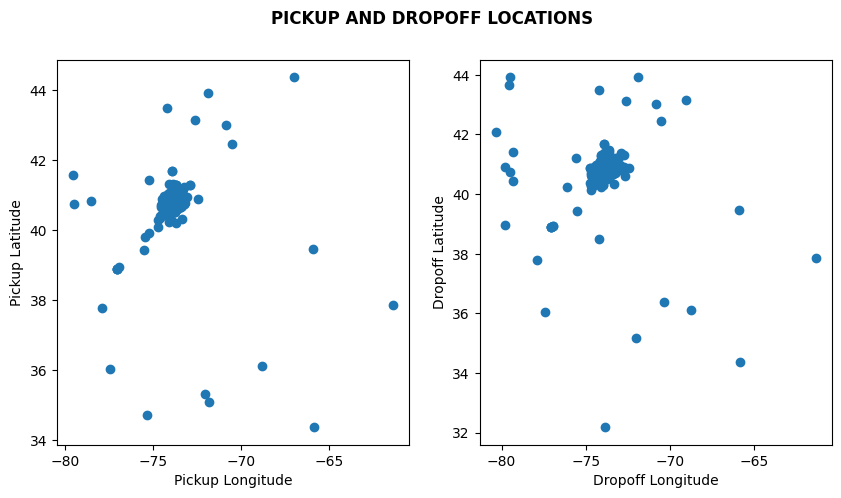

(1458637, 28)

In [27]:
# 6. LOCATIONS: LONGITUDE, LATITUDE: Revisualizing after dropping

#PICKUP AND DROPOFF LOCATIONS:

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x=df_train.pickup_longitude, y = df_train.pickup_latitude)
ax[1].scatter(x=df_train.dropoff_longitude, y = df_train.dropoff_latitude)
ax[0].set_ylabel("Pickup Latitude")
ax[0].set_xlabel("Pickup Longitude")
ax[1].set_ylabel("Dropoff Latitude")
ax[1].set_xlabel("Dropoff Longitude")
fig.suptitle("PICKUP AND DROPOFF LOCATIONS", fontweight="bold")
plt.show()
df_train.shape

In [28]:
# 7. PASSENGER COUNT

print("NO OF PASSENGERS vs TPASSENGER COUNT\n")
print(df_train.passenger_count.value_counts())

# print("pickup_datetime\t\tdropoff_datetime\ttrip_duration\tno_of_days")
# for i, c in enumerate(df.passenger_count):
#     if c == 0 and df.trip_duration[i] > 300:
#         print(f"{df.pickup_datetime[i]}\t{df.dropoff_datetime[i]}\t{df.trip_duration[i]}\t\t{trips}")

NO OF PASSENGERS vs TPASSENGER COUNT

passenger_count
1    1033536
2     210315
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64


# Observation:
1. Most of the trips are 1-2 passenger trips
2. There are trips that contain 0, 7, 8, 9 passengers which is inconsistent
3. The trips with 0 passengers may be due to trip cancellations
4. There are some trips with 0 passengers and more than 10 miniute trip duration, this may be due to wrong data entry or after droping one passenger another pickup was at long distance or some other reason.
5. Any we need to drop trips that has pasengers 0, 7, 8, 9 becuase of less value counts which may deviate oir model accuracy.
6. Dropiing the inconsistent data that may deviate our anlysis

In [29]:
passenger_counts_to_drop = [0, 7, 8, 9]
df_train = df_train[~df_train['passenger_count'].isin(passenger_counts_to_drop)]

#making sure content was dropped
df_train.shape

(1458572, 28)

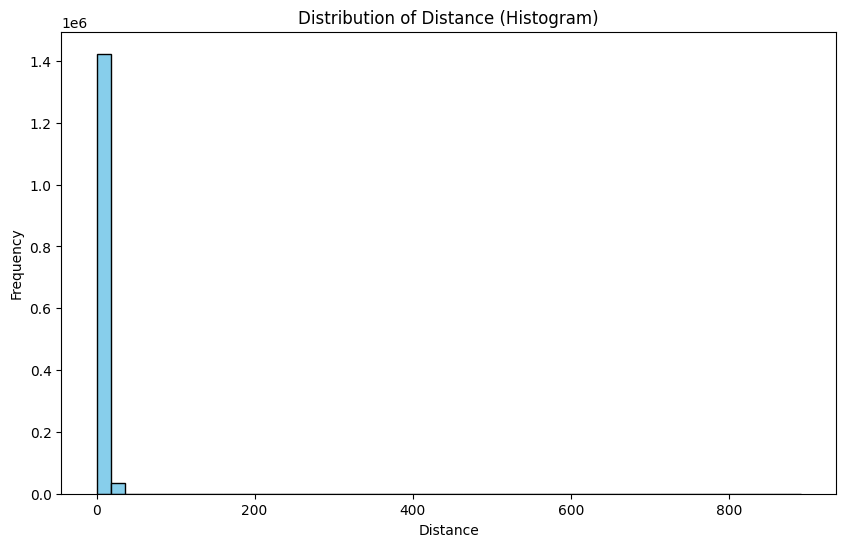

In [30]:
# 8. DISTANCE

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df_train['distance'], bins=50, color='skyblue', edgecolor='black')
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Distance (Histogram)')

plt.show()

# Observation
1. Most of the trips are with less than 50km.

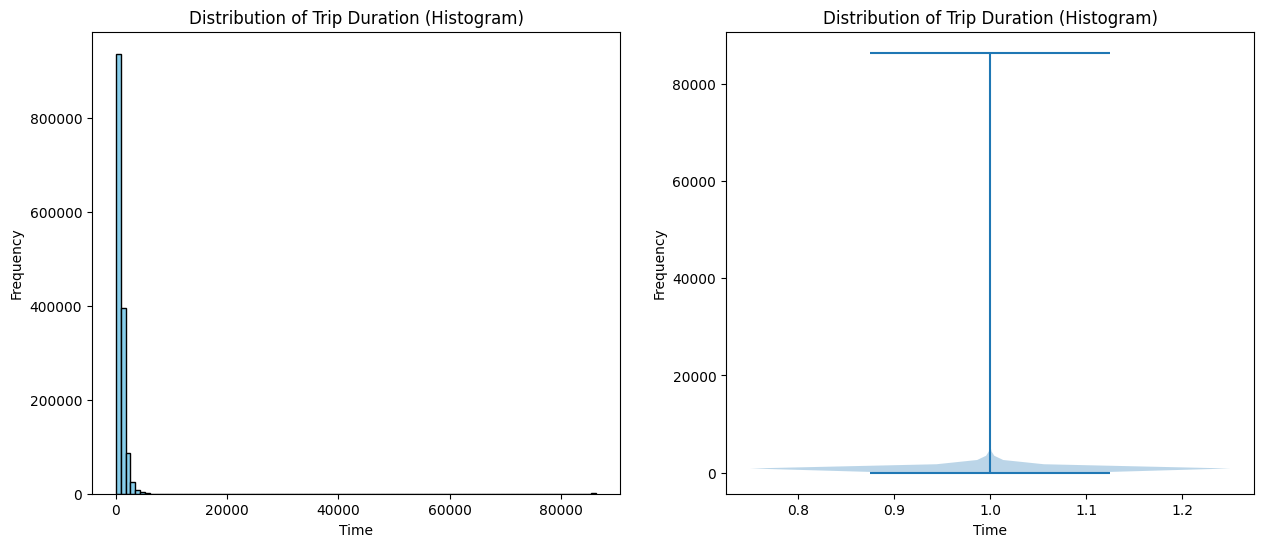

In [31]:
# 9. TRIP DURATION

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(df_train['trip_duration'], bins=100, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Trip Duration (Histogram)')

ax[1].violinplot(df_train.trip_duration)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of Trip Duration (Histogram)')
plt.show()

Text(0, 0.5, 'Frequency')

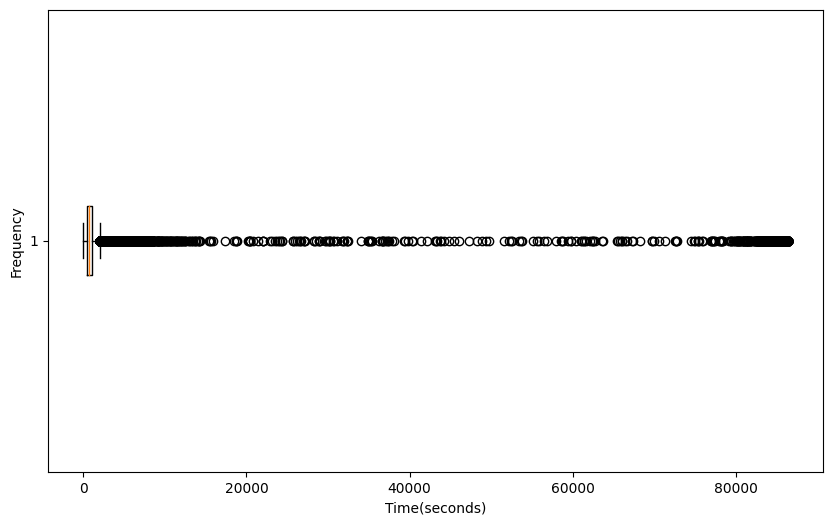

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.boxplot(df_train['trip_duration'], vert=False)
ax.set_xlabel('Time(seconds)')
ax.set_ylabel('Frequency')

# Observation
1. Most of the trips have less than 10000 secods of duration.
2. Very less have more than 20000 seconds have duration.
3. If it is found inconsitent in further anlysis droping them is better.
4. Some trips last for days.

In [33]:
# 10.store and fwd flag

df_train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1450530
Y       8042
Name: count, dtype: int64

# Bivariant Analysis
1. SINCE OUR TARGET VARIABLE FOR BUILDING OUR MODEL IS trip_duration LETS CROSS OTHER FEATURES WITHIT.

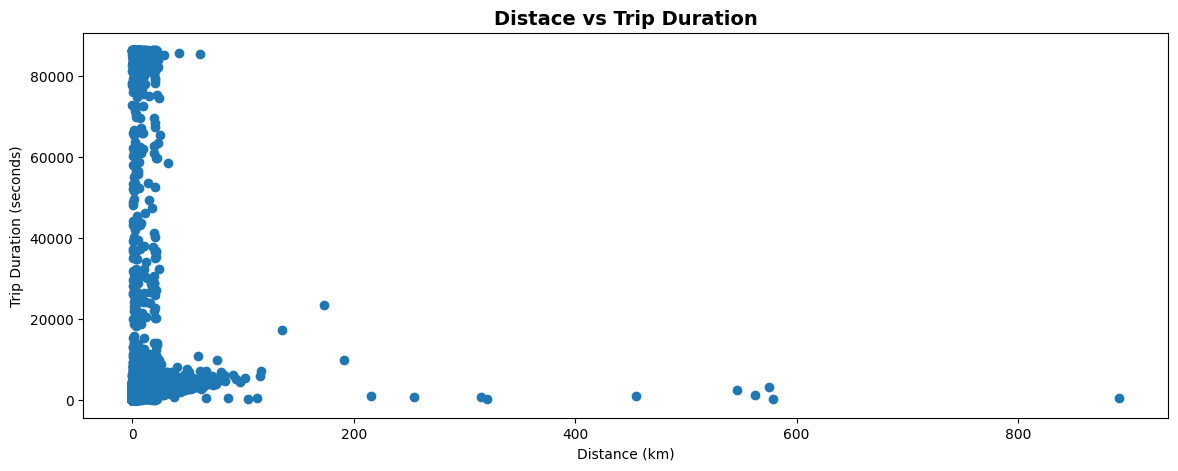

Maximum trip duration: 86392
Trip duration with more than 6.0 hours and distance between 0 to 100km is 2052
Trip duration with more than 2.0 hours and distance between 0 to 20km is 2115
Trip duration with more than 2.0 hours and distance between 20 to 100km is 65
Trip duration with more than 4.0 hours and distance between 20 to 40km is 65
Trip duration with more than 4.0 hours and distance more than 100km is 16


In [34]:
# 1. DISTANCE VS TRIP DURATION

plt.figure(figsize=(14, 5))
plt.scatter(y = df_train.trip_duration, x = df_train.distance)
plt.ylabel("Trip Duration (seconds)")
plt.xlabel("Distance (km)")
plt.title("Distace vs Trip Duration", fontsize = 14, fontweight = "bold")
plt.show()

print(f"Maximum trip duration: {df_train.trip_duration.max()}")

count = ((df_train['distance'] > 0) & (df_train['distance'] <= 100) & (df_train['trip_duration'] >= 21600) & (df_train['store_and_fwd_flag'] == "N")).sum()
print(f"Trip duration with more than {21600/3600} hours and distance between 0 to 100km is {count}")

count = ((df_train['distance'] >= 0) & (df_train['distance'] <= 20) & (df_train['trip_duration'] >= 7200) & (df_train['store_and_fwd_flag'] == "N")).sum()
print(f"Trip duration with more than {7200/3600} hours and distance between 0 to 20km is {count}")

count = ((df_train['distance'] > 20) & (df_train['distance'] <= 100) & (df_train['trip_duration'] >= 21600) & (df_train['store_and_fwd_flag'] == "N")).sum()
print(f"Trip duration with more than {7200/3600} hours and distance between 20 to 100km is {count}")

count = ((df_train['distance'] > 20) & (df_train['distance'] <= 40) & (df_train['trip_duration'] >= 14400) & (df_train['store_and_fwd_flag'] == "N")).sum()
print(f"Trip duration with more than {14400/3600} hours and distance between 20 to 40km is {count}")

count = ((df_train['distance'] > 100) & (df_train['trip_duration'] <= 14400) & (df_train['store_and_fwd_flag'] == "N")).sum()
print(f"Trip duration with more than {14400/3600} hours and distance more than 100km is {count}")



# Observation
1. There are trips with zero km and very high trip durations and vey low trip durations and large distaces clearly this is an oulier and to delt with.
2. This kind of data definitely affects the model and droping them is better.
3. In NYC, the average taxi speed is approximately 10-20 miles per hour (16-32 km/h). Considersing the above fact, It takes minimum of 4 hours to travel 100km There are some trips in which more than 100km are coverd with in seconds and hours which we need to take care. so lets drop them.
4. On the basis of above fact The following are that must be removed.
5. to cover the distance less than 100km some trips took more than 6 hours which is an outlier
6. There are some trips that are more than 100km and covered in lessthan 4hrs which another oulier
7. drop all the outliers.
8. THERE ARE TRIPS THAT HAVE DISTANCE MORE THAN 200KM COVERD WITH IN 100 SECONDS WHICH IS AN OUTLIER AND NEED TO REMOVED.
9. Removing outliers like distace coverd is zero and trip duration is more than onsecond

In [35]:
# Dropping the outliers

df_train.drop(df_train[(df_train['distance'] >= 0) & (df_train['distance'] <= 20) & (df_train['trip_duration'] >= 7200) & (df_train['store_and_fwd_flag'] == "N")].index, inplace=True)
df_train.drop(df_train[(df_train['distance'] > 20) & (df_train['distance'] <= 100) & (df_train['trip_duration'] >= 21600) & (df_train['store_and_fwd_flag'] == "N")].index, inplace=True)
df_train.drop(df_train[(df_train['distance'] > 20) & (df_train['distance'] <= 40) & (df_train['trip_duration'] >= 14400) & (df_train['store_and_fwd_flag'] == "N")].index, inplace=True)
df_train.drop(df_train[(df_train['distance'] > 100) & (df_train['trip_duration'] <= 14400) & (df_train['store_and_fwd_flag'] == "N")].index, inplace=True)
df_train.drop(df_train[(df_train['distance'] == 0) & (df_train['trip_duration'] >= 1)].index, inplace=True)
df_train.shape

(1450490, 28)

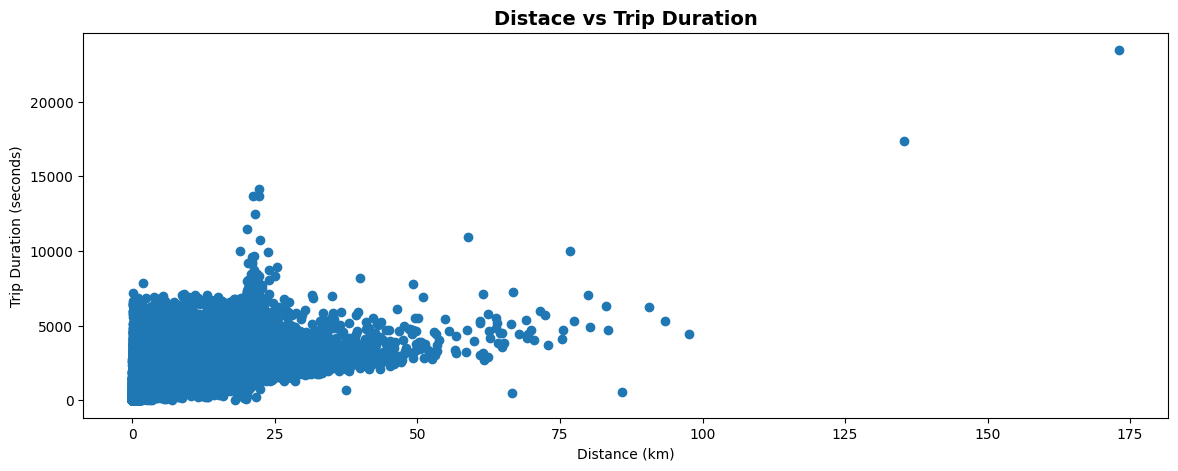

In [36]:
# 1. DISTANCE VS TRIP DURATION: Replotting after dropping

plt.figure(figsize=(14, 5))
plt.scatter(y = df_train.trip_duration, x = df_train.distance)
plt.ylabel("Trip Duration (seconds)")
plt.xlabel("Distance (km)")
plt.title("Distace vs Trip Duration", fontsize = 14, fontweight = "bold")
plt.show()


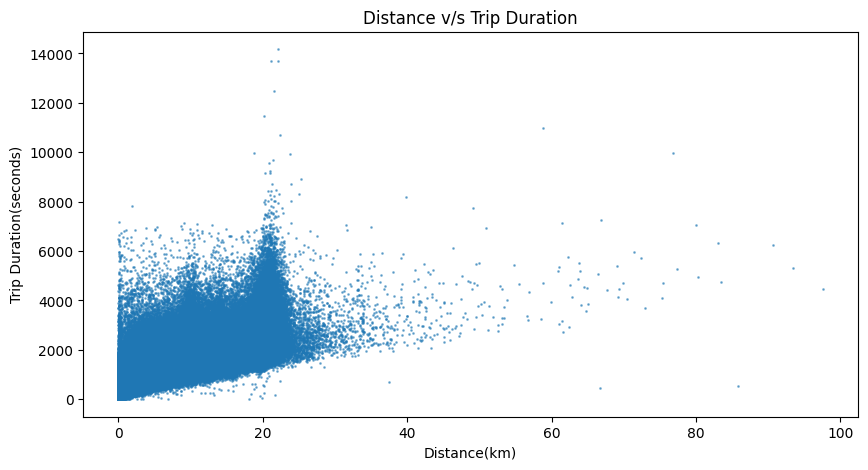

In [37]:
# 1. DISTANCE VS TRIP DURATION: Replotting after dropping

plt.figure(figsize = (10,5))
dur_dist = df_train.loc[(df_train.distance >= 0) & (df_train.distance <= 100), ['distance','trip_duration']]
plt.scatter(dur_dist.distance, dur_dist.trip_duration , s=1, alpha=0.5)
plt.xlabel('Distance(km)')
plt.ylabel('Trip Duration(seconds)')
plt.title('Distance v/s Trip Duration')
plt.show()

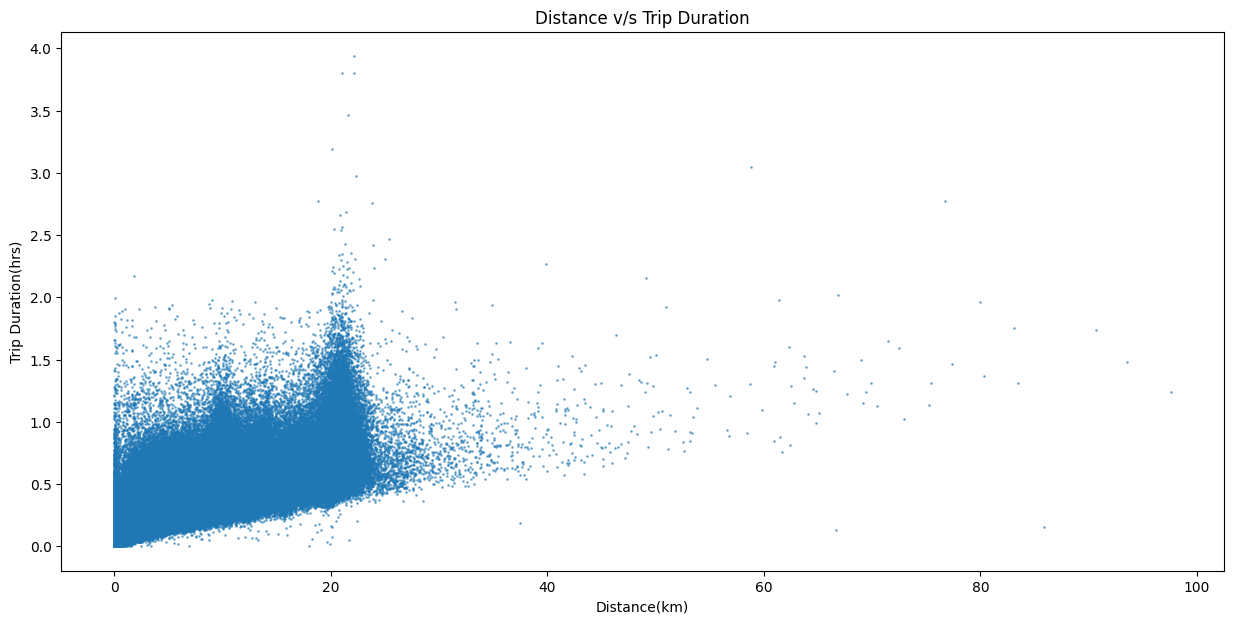

(1450490, 28)

In [38]:
plt.figure(figsize = (15,7))
dur_dist = df_train.loc[(df_train.distance >= 0) & (df_train.distance <= 100), ['distance','trip_duration']]
plt.scatter(dur_dist.distance, dur_dist.trip_duration/3600, s=1, alpha=0.5)
plt.xlabel('Distance(km)')
plt.ylabel('Trip Duration(hrs)')
plt.title('Distance v/s Trip Duration')
plt.show()
df_train.shape

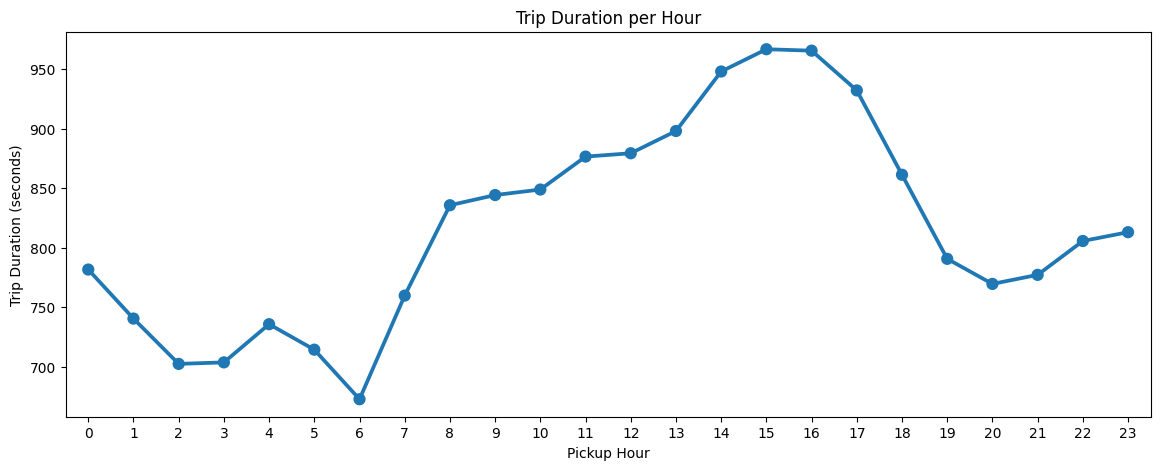

In [39]:
# 2. TRIP DURATION VS HOURS

plt.figure(figsize = (14,5))
group1 = df_train.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(x=group1.index, y=group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

# Observation:
1. Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.
2. Average trip duration is generally highest around 3 PM during the busy streets.
3. Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

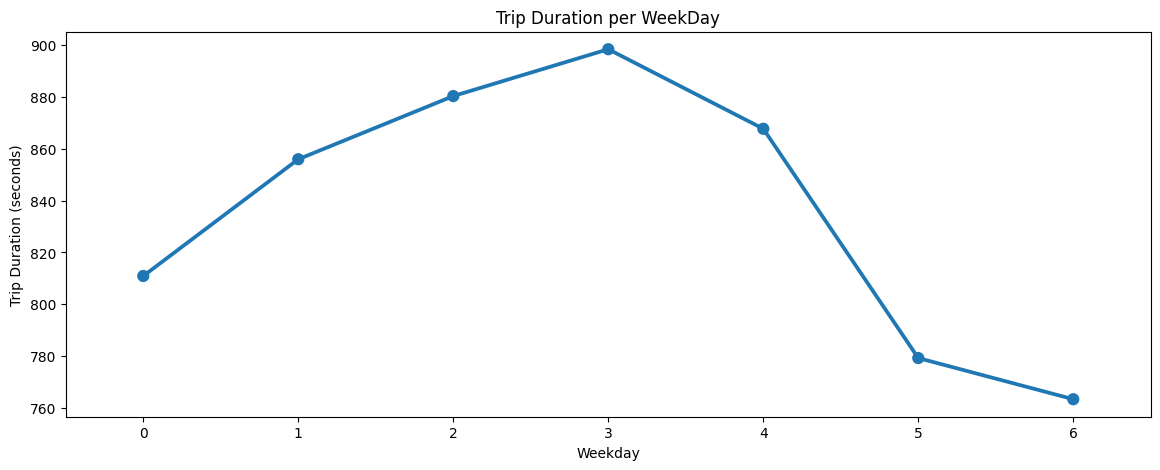

In [40]:
# 2. TRIP DURATION VS WEEKDAY

plt.figure(figsize = (14,5))
group2 = df_train.groupby('pickup_week_num').trip_duration.mean()
sns.pointplot(x=group2.index, y=group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

# Observation
1. We can see that trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.

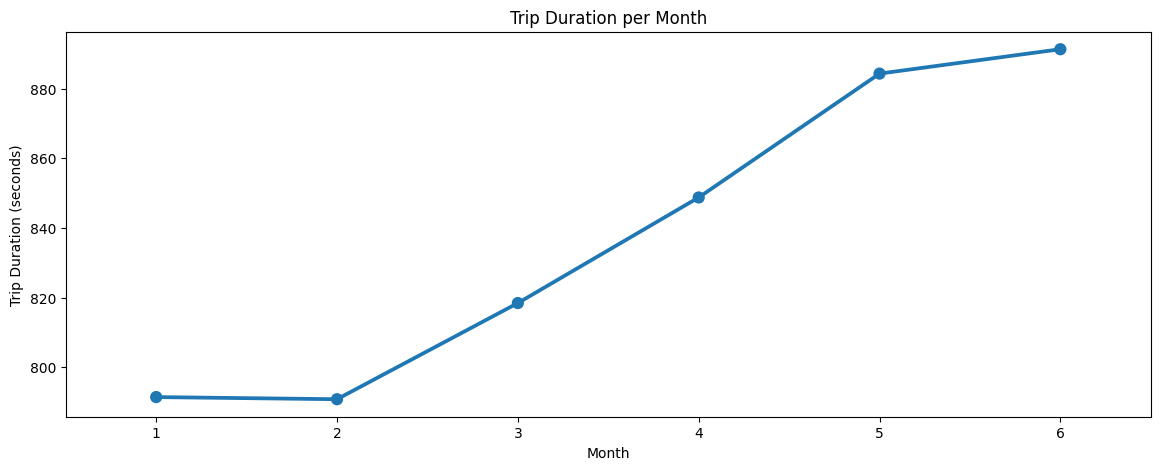

In [41]:
# 3. TRIP DURATION VS MONTH

plt.figure(figsize = (14,5))
group3 = df_train.groupby('pickup_month').trip_duration.mean()
sns.pointplot(x=group3.index, y=group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.show()

# Observation
1. We can see an increasing trend in the average trip duration along with each subsequent month.
2. The duration difference between each month is not much. It has increased gradually over a period of 6 months.
3. It is lowest during february when winters starts declining.

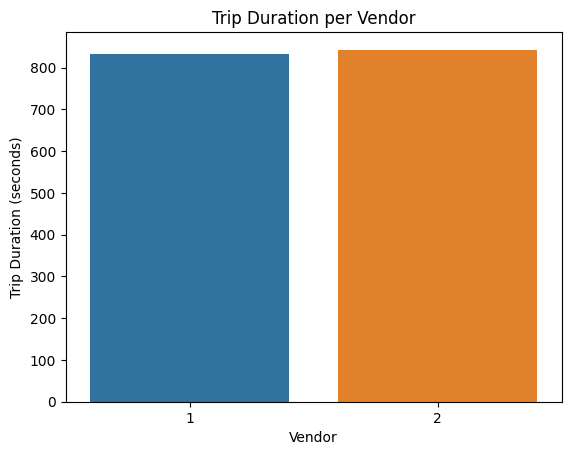

In [42]:
# 4. TRIP DURATION VS VENDOR ID

group4 = df_train.groupby('vendor_id').trip_duration.mean()
sns.barplot(x=group4.index, y=group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

# Observation
1. Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by a quite low margin.
2. But almost all same trips are provided by both vvendors.

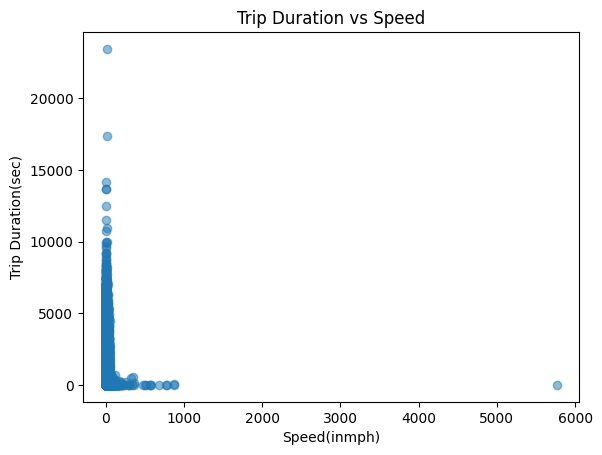

In [43]:
# 5. trip duration vs speed

plt.scatter(df_train['speed'], df_train['trip_duration'], alpha=0.5)
plt.xlabel('Speed(inmph)')
plt.ylabel('Trip Duration(sec)')
plt.title('Trip Duration vs Speed')
plt.show()

# Observation
1. There are trips more than 1000mph trip speed which is an outlier.
2. The maximum speed of a cab in nyc is 25 to 30 kmph, as we notice that some cabs have more than 100mph which are unfair values so it is better to drop them
3. dropping trips whose speed is more than 50mph.

In [44]:
df_train.drop(df_train[(df_train['speed'] >= 50)].index, inplace=True)

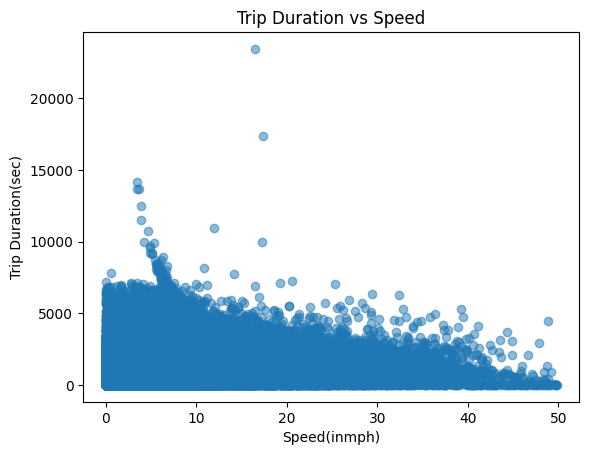

In [45]:
# 5. trip duration vs speed: Revisualizing after dropping

plt.scatter(df_train['speed'], df_train['trip_duration'], alpha=0.5)
plt.xlabel('Speed(inmph)')
plt.ylabel('Trip Duration(sec)')
plt.title('Trip Duration vs Speed')
plt.show()

In [46]:
print(df_train.speed.mean(),
df_train.speed.min(),
df_train.speed.max())
count = (df_train['speed'] > 40).sum()
count

print((df_train['trip_duration'] < 100).sum())

# for i, s in enumerate(df_train.speed):
#     if s > 20:
#         print(df_train['distance'].iloc[i], df_train['trip_duration'].iloc[i])

# for i, t in enumerate(df_train['trip_duration']):
#     if t <= 100:
#         print(df_train['distance'].iloc[i], df_train['trip_duration'].iloc[i])


#These code snippets just to manually knpw whether distance, tripduration and speed columns are fair or not.

8.97637018841685 0.0007396698877411115 49.82137526839933
16847


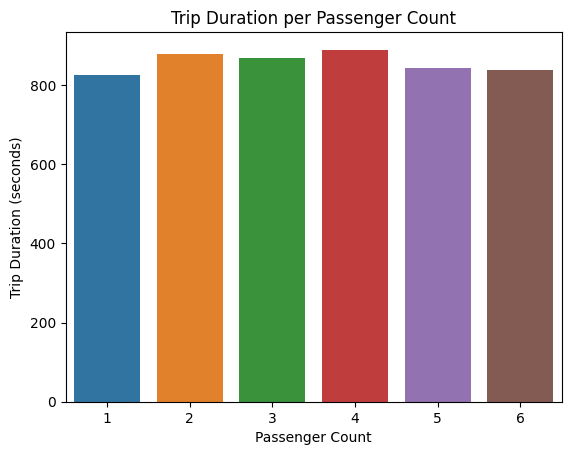

In [47]:
# 6. trip duration vs passenger count: Revisualizing after dropping

group5 = df_train.groupby('passenger_count').trip_duration.mean()
sns.barplot(x = group5.index, y = group5.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Passenger Count')
plt.title('Trip Duration per Passenger Count')
plt.show()

# Observation
1. Trips with passenger count = 4, 2 hs higher trip durations.
2. Trips with pssenger count = 1 has lower trip durations.
3. Found no outliers.

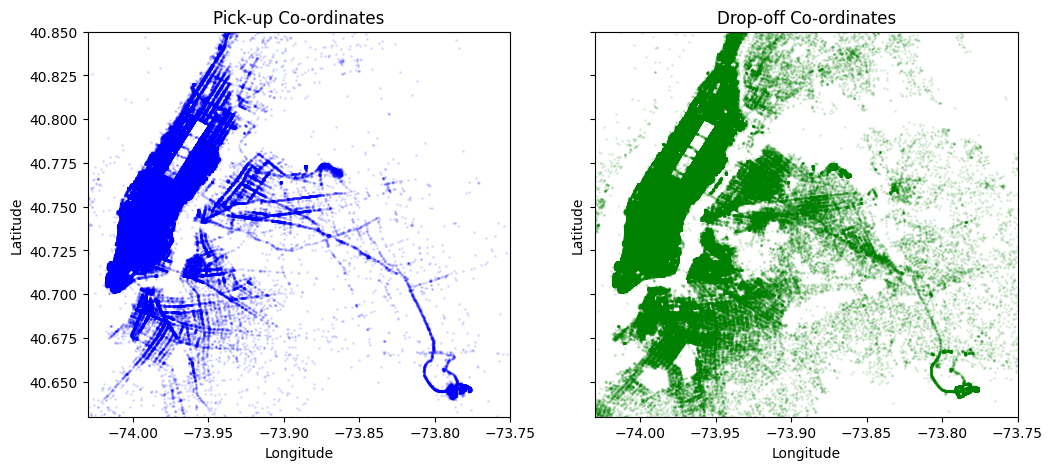

In [48]:
# 7. locations

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(df_train['pickup_longitude'].values, df_train['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df_train['dropoff_longitude'].values, df_train['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

# Observation
1. As we can see that most pickup and dropoff locations are from (-74, 40.7) to (-73.5, 40.815) locations and dropof locations are very wide spread compared to pickup.
2. Found no bad outliers. Plot was descent enough.

# Feature Engineering

1. We will drop the columns like id, picup_datetime, dropoff_datetime, store_andfwd_flag, pickup_week_day, dropoff_week_day, dropoff_date, pickup_date, pickup_time, dropoff_time.

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450272 entries, 0 to 1458643
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1450272 non-null  object        
 1   vendor_id           1450272 non-null  int64         
 2   pickup_datetime     1450272 non-null  datetime64[ns]
 3   dropoff_datetime    1450272 non-null  datetime64[ns]
 4   passenger_count     1450272 non-null  int64         
 5   pickup_longitude    1450272 non-null  float64       
 6   pickup_latitude     1450272 non-null  float64       
 7   dropoff_longitude   1450272 non-null  float64       
 8   dropoff_latitude    1450272 non-null  float64       
 9   store_and_fwd_flag  1450272 non-null  object        
 10  trip_duration       1450272 non-null  int64         
 11  pickup_week_day     1450272 non-null  object        
 12  pickup_week_num     1450272 non-null  int32         
 13  pickup_hour      

# Feature Selction

# TARGET VARIABLE: trip_duration

1. We will leave columns that are of object and datetime datatype.
2. Unselected Features: id, pickup_datetime, dropoff_datetime, pickup_week_day, pickup_date, dropoff_week_day, dropoff_hour, dropoff_month, dropoff_week_num, dropoff_date, dropoff_time, pickup_time, dropoff_session, dropoff_date, store_and_fwd_flag
3. Selected Features: vendor_id, passenger_count, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, trip_duration, pickup_week_num, pickup_hour, pickup_month, no_of_days, pickup_session, distance, speed
4. we will convert pickkup session in numerical type by feature encoding technique.

In [50]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_week_day', 'pickup_week_num', 'pickup_hour',
       'pickup_date', 'pickup_month', 'dropoff_week_day', 'dropoff_week_num',
       'dropoff_hour', 'dropoff_date', 'dropoff_month', 'pickup_time',
       'dropoff_time', 'no_of_days', 'pickup_session', 'dropoff_session',
       'distance', 'speed'],
      dtype='object')

In [51]:
def sessionConvert(session):
    if session == 'Night':
        return 1
    elif session == 'Morning':
        return 2
    elif session == 'Afternoon':
        return 3
    else:
        return 4

pickup_session_train = df_train['pickup_session'].tolist()
pickup_session_test = df_test['pickup_session'].tolist()

df_train['pickup_session'] = [sessionConvert(session) for session in pickup_session_train]
df_test['pickup_session'] = [sessionConvert(session) for session in pickup_session_test]

# Correlation Analysis for selected Features

1. Selected Features: vendor_id, passenger_count, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, trip_duration, pickup_week_num, pickup_hour, pickup_month, no_of_days, pickup_session, distance, speed

In [52]:
columns_for_correlation = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                           'dropoff_longitude', 'dropoff_latitude', 'trip_duration','pickup_week_num',
                           'pickup_hour', 'pickup_month','distance', 'speed', 'no_of_days', 'pickup_session']

selected_columns_df_train = df_train[columns_for_correlation]
correlation_matrix = selected_columns_df_train.corr(method='pearson')
correlation_matrix

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_week_num,pickup_hour,pickup_month,distance,speed,no_of_days,pickup_session
vendor_id,1.000000,0.287601,0.016364,0.003126,0.004427,0.005483,0.008221,0.001051,0.009084,-0.006402,0.010056,0.006271,NaN,0.009170
passenger_count,0.287601,1.000000,0.004409,-0.004621,-0.000176,-0.002146,0.014611,0.025127,0.008964,-0.002490,0.011056,-0.002534,NaN,0.007799
pickup_longitude,0.016364,0.004409,1.000000,-0.140512,0.266518,0.047648,0.361563,-0.030565,0.019322,0.007113,0.511822,0.294249,NaN,0.016731
pickup_latitude,0.003126,-0.004621,-0.140512,1.000000,0.055562,0.425027,-0.238167,-0.034358,0.012832,-0.002786,-0.317626,-0.117741,NaN,0.013676
dropoff_longitude,0.004427,-0.000176,0.266518,0.055562,1.000000,0.134162,0.224704,-0.002271,-0.043410,0.008194,0.363673,0.288505,NaN,-0.047276
dropoff_latitude,0.005483,-0.002146,0.047648,0.425027,0.134162,1.000000,-0.180970,-0.024252,0.015570,-0.001342,-0.156659,0.020036,NaN,0.016903
trip_duration,0.008221,0.014611,0.361563,-0.238167,0.224704,-0.180970,1.000000,-0.034134,0.029252,0.059648,0.771434,0.061405,NaN,0.022933
pickup_week_num,0.001051,0.025127,-0.030565,-0.034358,-0.002271,-0.024252,-0.034134,1.000000,-0.084250,-0.014622,0.008369,0.069234,NaN,-0.087320
pickup_hour,0.009084,0.008964,0.019322,0.012832,-0.043410,0.015570,0.029252,-0.084250,1.000000,-0.003565,-0.018192,-0.105069,NaN,0.964290
pickup_month,-0.006402,-0.002490,0.007113,-0.002786,0.008194,-0.001342,0.059648,-0.014622,-0.003565,1.000000,0.017152,-0.030468,NaN,-0.004248


In [53]:
df_train.no_of_days.value_counts()

no_of_days
0    1450272
Name: count, dtype: int64

# Observation

1. Since no_of_days has constant values i.e only zero it is showing NaN correlation so it should be added to unselected features list
2. Selected Features: vendor_id, passenger_count, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, trip_duration, pickup_week_num, pickup_hour, pickup_month, pickup_session, distance
3. Unselected Features: id, pickup_datetime, dropoff_datetime, pickup_week_day, pickup_date, dropoff_week_day, dropoff_hour, dropoff_month, dropoff_week_num, dropoff_date, dropoff_time, pickup_time, dropoff_session, dropoff_date, store_and_fwd_flag, no_of_days, speed
4. As we have calculated speed from trip duration we are not taking it as our feature.

In [54]:
# Correlation matrix after removing no_of_days

columns_for_correlation = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                           'dropoff_longitude', 'dropoff_latitude', 'trip_duration','pickup_week_num',
                           'pickup_hour', 'pickup_month','distance', 'pickup_session']

selected_columns_df_train = df_train[columns_for_correlation]
correlation_matrix = selected_columns_df_train.corr(method='pearson')
correlation_matrix

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_week_num,pickup_hour,pickup_month,distance,pickup_session
vendor_id,1.000000,0.287601,0.016364,0.003126,0.004427,0.005483,0.008221,0.001051,0.009084,-0.006402,0.010056,0.009170
passenger_count,0.287601,1.000000,0.004409,-0.004621,-0.000176,-0.002146,0.014611,0.025127,0.008964,-0.002490,0.011056,0.007799
pickup_longitude,0.016364,0.004409,1.000000,-0.140512,0.266518,0.047648,0.361563,-0.030565,0.019322,0.007113,0.511822,0.016731
pickup_latitude,0.003126,-0.004621,-0.140512,1.000000,0.055562,0.425027,-0.238167,-0.034358,0.012832,-0.002786,-0.317626,0.013676
dropoff_longitude,0.004427,-0.000176,0.266518,0.055562,1.000000,0.134162,0.224704,-0.002271,-0.043410,0.008194,0.363673,-0.047276
dropoff_latitude,0.005483,-0.002146,0.047648,0.425027,0.134162,1.000000,-0.180970,-0.024252,0.015570,-0.001342,-0.156659,0.016903
trip_duration,0.008221,0.014611,0.361563,-0.238167,0.224704,-0.180970,1.000000,-0.034134,0.029252,0.059648,0.771434,0.022933
pickup_week_num,0.001051,0.025127,-0.030565,-0.034358,-0.002271,-0.024252,-0.034134,1.000000,-0.084250,-0.014622,0.008369,-0.087320
pickup_hour,0.009084,0.008964,0.019322,0.012832,-0.043410,0.015570,0.029252,-0.084250,1.000000,-0.003565,-0.018192,0.964290
pickup_month,-0.006402,-0.002490,0.007113,-0.002786,0.008194,-0.001342,0.059648,-0.014622,-0.003565,1.000000,0.017152,-0.004248


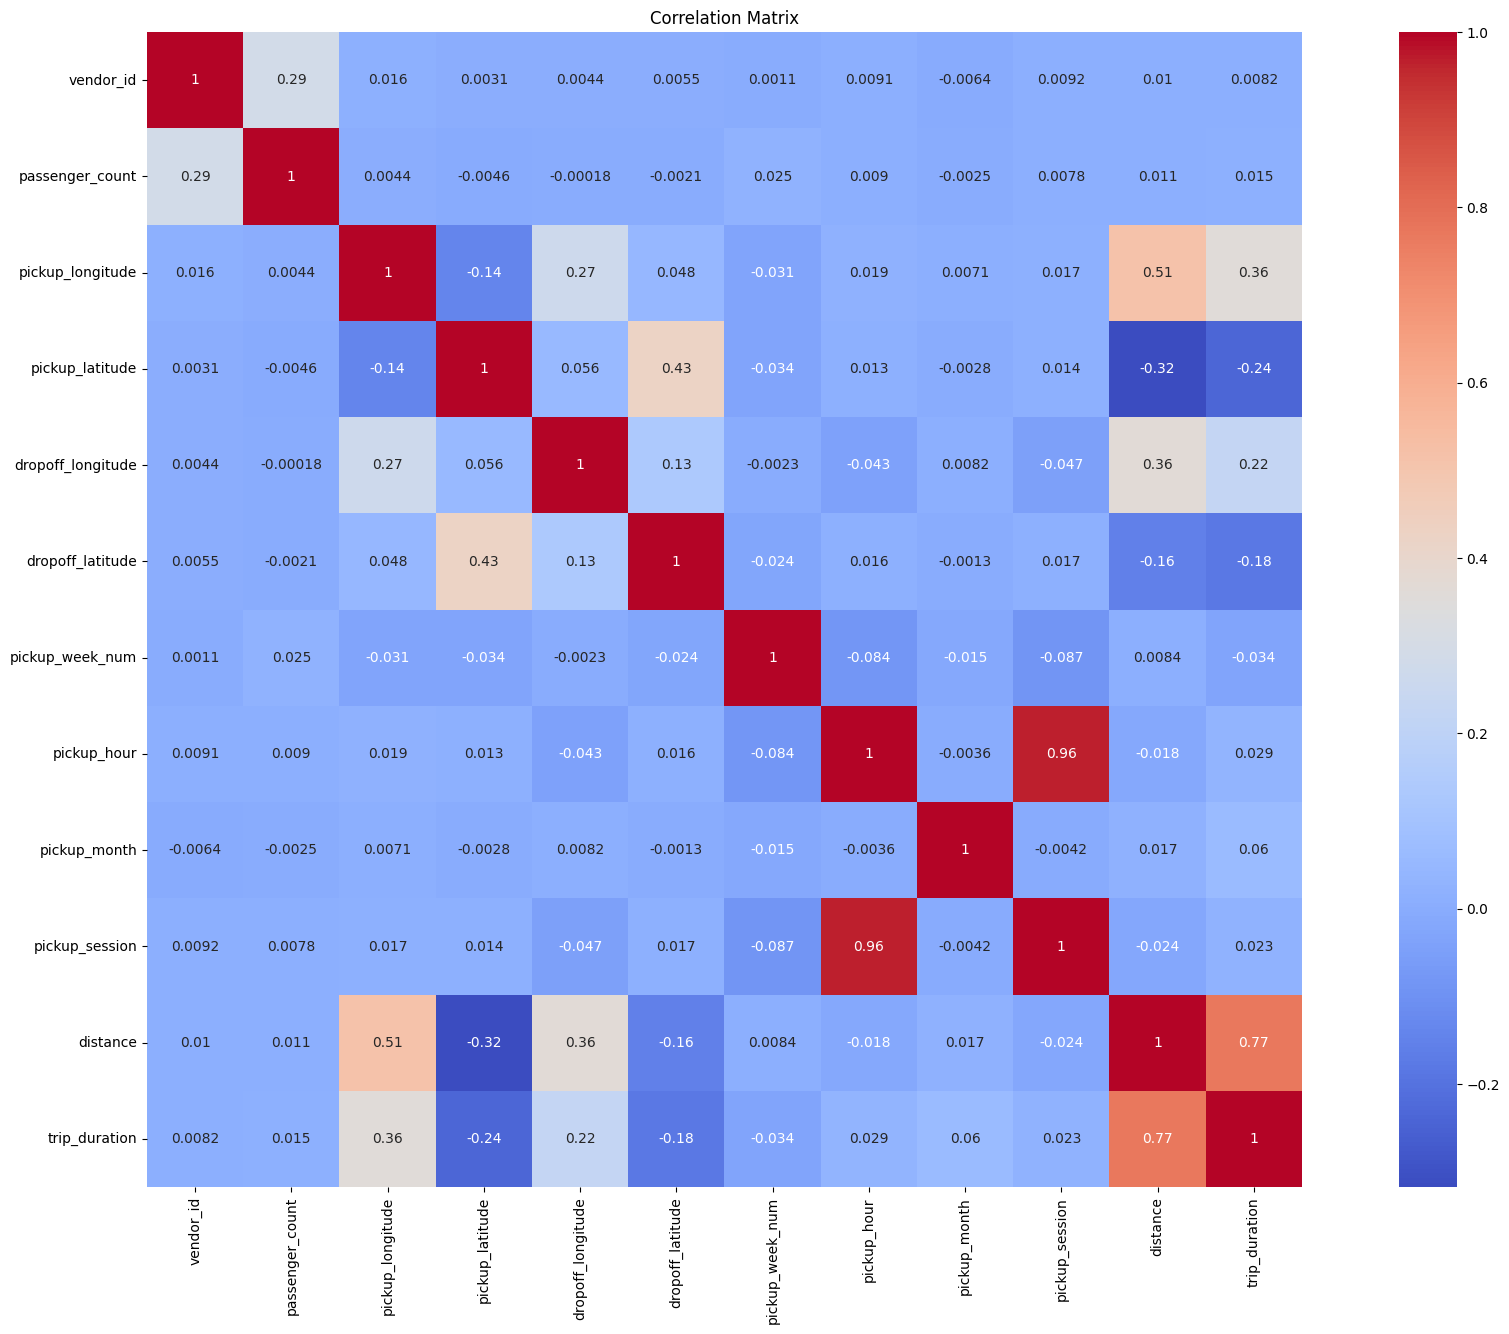

In [55]:
columns = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
           'dropoff_longitude', 'dropoff_latitude',
           'pickup_week_num', 'pickup_hour', 'pickup_month', 'pickup_session', 'distance', 'trip_duration']

corr_matrix = df_train[columns].corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Observation
1. There are no features that have zero correlation coefficient with tharget variable.
2. Pickup_weeknum, dropoff_latitude, pickup_latitude have negative correlation coefficinet with target variable.
3. Remaining all have positive correlation coefficients with target variable.
4. We will use all features that are under selected features mentioned above.

# Model Building Linear Regression Model

In [56]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 
            'dropoff_latitude','pickup_week_num', 'pickup_hour', 'pickup_month', 'pickup_session', 'distance']

target = 'trip_duration'

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=10011)

X_test_for_submission = df_test[features]

In [57]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

model_train_score = linear_regression_model.score(X_train, y_train)
model_test_score = linear_regression_model.score(X_test, y_test)

print("Training Score: ", model_train_score)
print("Testing Score : ", model_test_score)

Training Score:  0.6091535383095908
Testing Score :  0.6078540424083048


# Regularization

In [58]:
#BUILDING THE LASSO REGRESSIN MODEL WITH HYPER PARAMETERS aplha = 0.0001 ans max_iter = 10e5

lasso_regression_model_alpha2 = Lasso(alpha = 0.1, max_iter = 100000)
lasso_regression_model_alpha2.fit(X_train, y_train)

lasso_model_train_score = lasso_regression_model_alpha2.score(X_train, y_train)
lasso_model_test_score = lasso_regression_model_alpha2.score(X_test, y_test)
coeff_used = np.sum(lasso_regression_model_alpha2.coef_ != 0)

print("Training Score: ", lasso_model_train_score)
print("Testing Score : ", lasso_model_test_score)
print("No Of Features Used: ", coeff_used)

Training Score:  0.6090275320396175
Testing Score :  0.6077253131458691
No Of Features Used:  11


In [59]:
#BUILDING A RIDGE REGERESSION MODEL WITH alpha = 0.01

rr = Ridge(alpha=1) 
rr.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("Training Score: ", Ridge_train_score)
print("Testing Score : ", Ridge_test_score)

Training Score:  0.6091535276117415
Testing Score :  0.6078538703396839


# Observation
1. Reglarization using rigde and lasso also gave same r2_score which means model is quite predictabel.

# Accuracy Matrics

In [60]:
y_pred = linear_regression_model.predict(X_test)

#Different type of error metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Percentage Absolute Error (MAE):", mape)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 280.5673412873361
Mean Percentage Absolute Error (MAE): 0.5955766319329863
Mean Squared Error (MSE): 169318.0983074269
R-squared (R2) Score: 0.6078540424083048


# Observation
Since both the training and testing scores are close, it suggests that the model's performance is consistent on both the training and testing datasets. However, the R-squared value is not very high, which may indicate that the linear regression model might not be the best fit for capturing all the complexities in the data.

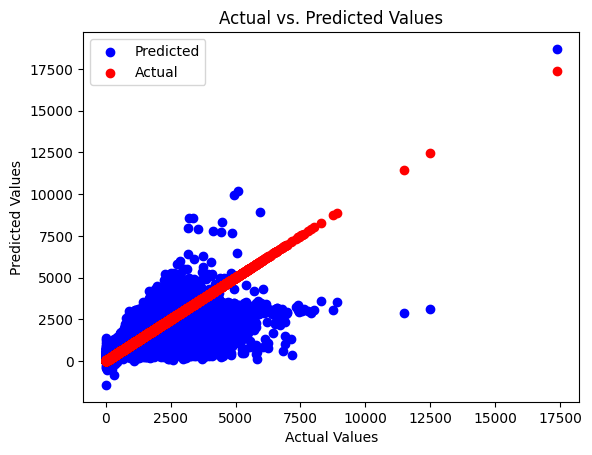

In [61]:
# visulaizing actual vs predicted values

plt.scatter(y_test, y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


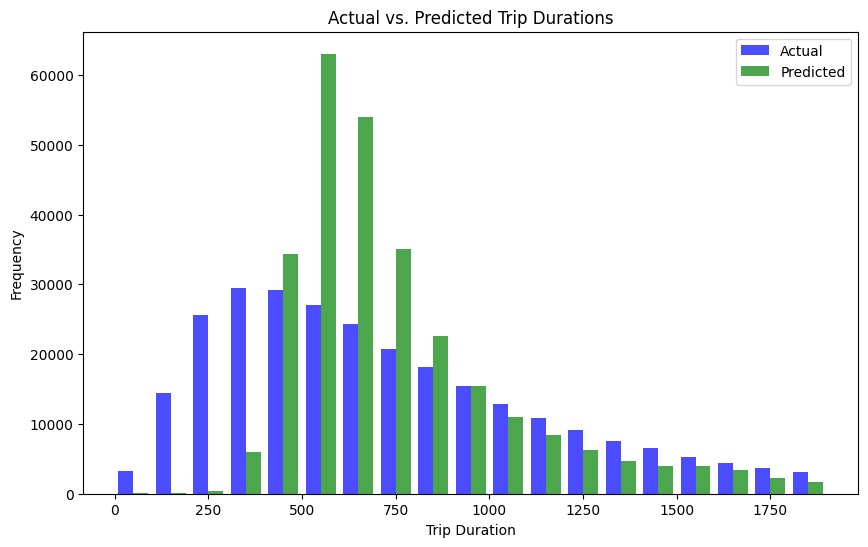

In [62]:
bins = np.arange(0, 2000, 100) 
actual_counts, _ = np.histogram(y_test, bins=bins)
predicted_counts, _ = np.histogram(y_pred, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.figure(figsize=(10, 6))
bar_width = 40
plt.bar(bin_centers - bar_width / 2, actual_counts, width=bar_width, color='b', alpha=0.7, label='Actual')
plt.bar(bin_centers + bar_width / 2, predicted_counts, width=bar_width, color='g', alpha=0.7, label='Predicted')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Trip Durations')
plt.legend()
plt.show()

# Submission Result
using test dataframe and predicting trip durations:


In [64]:
y_test_for_prediction = linear_regression_model.predict(X_test_for_submission)

df_test["Predicted_trip_duration"] = y_test_for_prediction

df_test[["Predicted_trip_duration", "pickup_datetime","pickup_longitude",
         "pickup_latitude","dropoff_longitude","dropoff_latitude"]].head(20)

,Predicted_trip_duration,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,824.960940,2016-06-30 23:59:58,-73.988129,40.732029,-73.990173,40.756680
1,863.338476,2016-06-30 23:59:53,-73.964203,40.679993,-73.959808,40.655403
2,673.420217,2016-06-30 23:59:47,-73.997437,40.737583,-73.986160,40.729523
3,1218.100850,2016-06-30 23:59:41,-73.956070,40.771900,-73.986427,40.730469
4,576.605026,2016-06-30 23:59:33,-73.970215,40.761475,-73.961510,40.755890
5,990.466059,2016-06-30 23:59:30,-73.991302,40.749798,-73.980515,40.786549
6,947.377179,2016-06-30 23:59:15,-73.978310,40.741550,-73.952072,40.717003
7,888.082532,2016-06-30 23:59:09,-74.012711,40.701527,-73.986481,40.719509
8,2733.148101,2016-06-30 23:58:55,-73.992332,40.730511,-73.875618,40.875214
9,702.067198,2016-06-30 23:58:46,-73.993179,40.748760,-73.979309,40.761311


# NoteBook Link:
http://localhost:8888/notebooks/Desktop/DATA%20SCIENCE/DATASETS%20ANALYSIS/Final_NYC_Taxi_trip_Prediction_Project_17-07-2023.ipynb#